# Chapter 7 
 Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import warnings
import os
os.environ['OUTDATED_IGNORE'] = '1'
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Modern analytic methods: Part I

In [2]:
import warnings
import random
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.formula.api as smf

from scipy import stats
import matplotlib.pyplot as plt
import mistat

## Introduction to Computer Age Statistics

## Data Preparation

## The Information Quality Framework

## Determining Model Performance

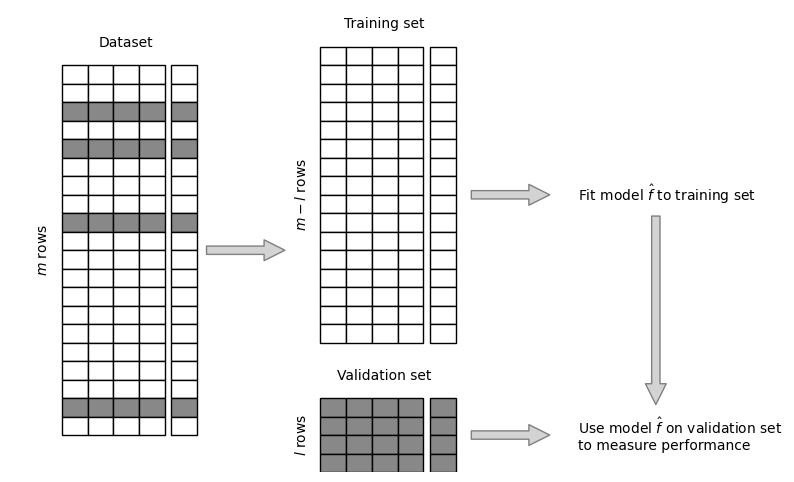

In [3]:
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

random.seed(1)

xlim = (-2, 28)
ylim = (78, 103)
nrows = 20

def drawDataRow(ax, x, y, ncolumns, alpha=1, facecolor='none', delta=0):
    for i in range(ncolumns-1):
        ax.add_patch(Rectangle((x + i, y), 1, 1, edgecolor='black',
                               facecolor=facecolor, alpha=alpha))
    ax.add_patch(Rectangle((x + ncolumns-1 + delta, y), 1, 1,
                           edgecolor='black', facecolor=facecolor, alpha=alpha))

def drawDataset(ax, x, y, nrows, ncolumns, selected=None, facecolor='white', alpha=1, delta=0):
    selected = selected or []
    for row in range(nrows):
        drawDataRow(ax, x, y-row, ncolumns, alpha=alpha, facecolor='#888888' if row in selected else facecolor,
                   delta=delta)

fig, ax = plt.subplots(figsize=(10, 6))

# Dataset
middle = 100-nrows/2+1
selected = random.sample(range(nrows), int(nrows * 0.2))
drawDataset(ax, 0, 100-1, nrows, 5, selected=selected, delta=0.25)
ax.text(2.5, 102-1, r'Dataset', ha='center')
ax.text(-1, middle-1, r'$m$ rows', va='center', rotation='vertical')

arrow = mpatches.FancyArrowPatch((5.5, middle-1), (8.75, middle-1), mutation_scale=30,
                                facecolor='lightgrey', edgecolor='grey')
ax.add_patch(arrow)

# Trainingset
ntrain = nrows - len(selected)
drawDataset(ax, 10, 100, ntrain, 5, selected=None, delta=0.25)
ax.text(12.5, 102, r'Training set', ha='center')
ax.text(9, middle+2, r'$m-l$ rows', va='center', rotation='vertical')

# Testset
ntest = len(selected)
drawDataset(ax, 10, 100 - ntrain - 3, ntest, 5, selected=list(range(ntest)), delta=0.25)
ax.text(12.5, 83, r'Validation set', ha='center')
ax.text(9, 80, r'$l$ rows', va='center', rotation='vertical')

arrow = mpatches.FancyArrowPatch((15.75, middle+2), (19, middle+2), mutation_scale=30,
                                facecolor='lightgrey', edgecolor='grey')
ax.add_patch(arrow)
ax.text(20, middle+2, r'Fit model $\hat{f}$ to training set', va='center')

arrow = mpatches.FancyArrowPatch((15.75, 80), (19, 80), mutation_scale=30,
                                facecolor='lightgrey', edgecolor='grey')
ax.add_patch(arrow)
ax.text(20, 80, 'Use model ' + r'$\hat{f}$ on validation set' + '\nto measure performance', va='center')

arrow = mpatches.FancyArrowPatch((23, middle+1), (23, 81.5), mutation_scale=30,
                                facecolor='lightgrey', edgecolor='grey')
ax.add_patch(arrow)


ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
plt.axis('off')
plt.show()

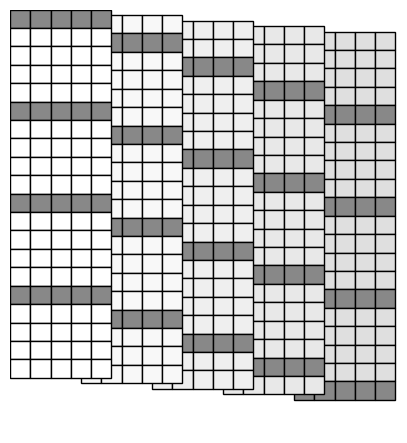

In [4]:
random.seed(2)

xlim = (0, 19.1)
ylim = (78, 101)
nrows = 20
colorCh1 = 'FFEEDDCBA9876'
colorCh2 = 'F8F8F8FBA9876'

fig, ax = plt.subplots(figsize=(5, 5.5))
for nboot in reversed(range(5)):
    dx = nboot*0.6
    dx = nboot*3.5
    dy = nboot*0.3
    facecolor = '#'
    for _ in range(3):
        facecolor += colorCh1[nboot] + colorCh2[nboot]
    selected = range(nboot, nrows, 5)
    drawDataset(ax, 0 + dx, 100 - dy, nrows, 5, selected=selected, facecolor=facecolor)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
plt.axis('off')
plt.show()

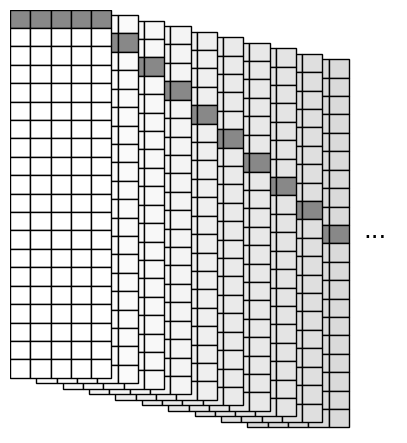

In [5]:
fig, ax = plt.subplots(figsize=(5, 5.5))
colorCh1 = 'FFFFEEEEDDDDCCCCBBBBAAAA'
colorCh2 = 'FA84' * 10

for nboot in reversed(range(10)):
    dx = nboot*1.3
    dy = nboot*0.3
    facecolor = '#'
    for _ in range(3):
        facecolor += colorCh1[nboot] + colorCh2[nboot]
    selected = [nboot]
    drawDataset(ax, 0 + dx, 100 - dy, nrows, 5, selected=selected, facecolor=facecolor)
ax.text(17.4, 89, '...', va='center', fontsize='xx-large')

ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
plt.axis('off')
plt.show()


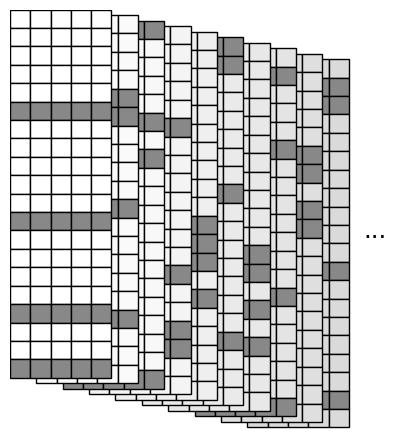

In [6]:
fig, ax = plt.subplots(figsize=(5, 5.5))
# Dataset
for nboot in reversed(range(10)):
    dx = nboot*1.3
    dy = nboot*0.3
    facecolor = '#'
    for _ in range(3):
        facecolor += colorCh1[nboot] + colorCh2[nboot]

    selected = random.sample(range(nrows), int(nrows * 0.2))
    drawDataset(ax, 0 + dx, 100 - dy, nrows, 5, selected=selected, alpha=1, facecolor=facecolor)
ax.text(17.4, 89, '...', va='center', fontsize='xx-large')

ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
plt.axis('off')
plt.show()

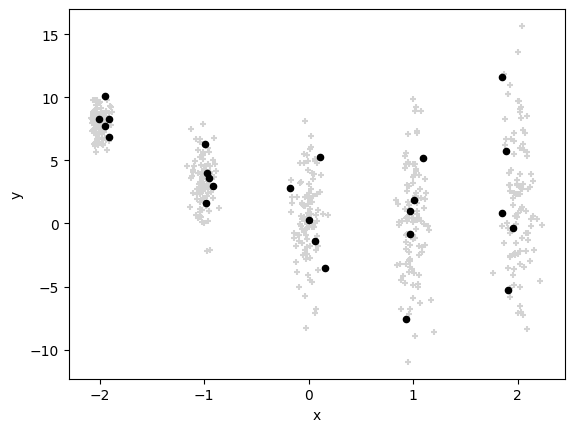

In [7]:
np.random.seed(0)
yerr = 0.2
yerr = 1
def createData(n):
    x = [-2, -1, 0, 1, 2]
    data = []
    for i, xi in enumerate(x):
        for _ in range(n):
            dx = (i+5) * 0.01 * stats.norm.rvs()
            dy = (i+1) * yerr * stats.norm.rvs()
            data.append({'x': xi+dx, 'y': dy + (xi - 0.75) ** 2 + 0.3, 'group': i})
    return pd.DataFrame(data)
df = createData(5)
valid_df = createData(100)
ax = valid_df.plot.scatter(x='x', y='y', color='lightgrey', marker='+')
df.plot.scatter(x='x', y='y', ax=ax, color='black')
plt.show()

In [8]:
formula = 'y ~ 1 + x + np.power(x, 2)'
def sample80(df):
  """ Sample 80% of the dataset using RSWR """
  return df.sample(int(0.8 * len(df)), replace=True)
stratR2 = []
for _ in range(100):
    stratSample = df.groupby('group').apply(lambda x: sample80(x), include_groups=False)
    model = smf.ols(formula=formula, data=stratSample).fit()
    stratR2.append(model.rsquared)
sampleR2 = []
for _ in range(100):
    sample = sample80(df)
    model = smf.ols(formula=formula, data=sample).fit()
    sampleR2.append(model.rsquared)

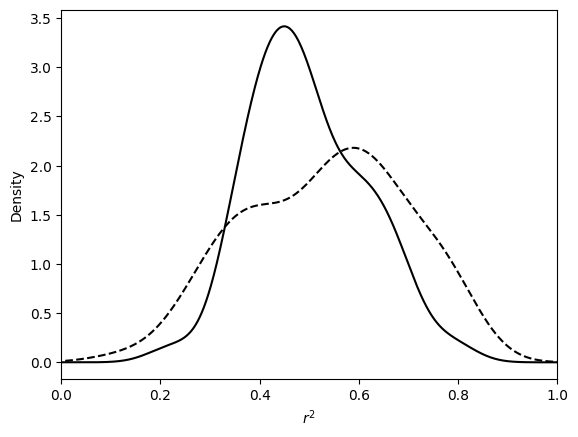

In [9]:
ax = pd.Series(stratR2).plot.density(color='black')
pd.Series(sampleR2).plot.density(ax=ax, color='black', linestyle='--')
ax.set_xlim(0, 1.0)
ax.set_xlabel(r'$r^2$')
plt.show()

## Decision Trees

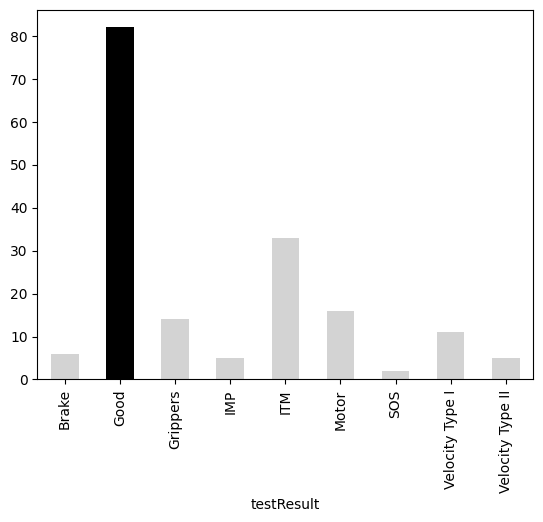

In [10]:
sensors = mistat.load_data('SENSORS.csv')
dist = sensors['testResult'].value_counts()
dist = dist.sort_index()
ax = dist.plot.bar(color='lightgrey')
ax.patches[dist.index.get_loc('Good')].set_facecolor('black')
plt.show()

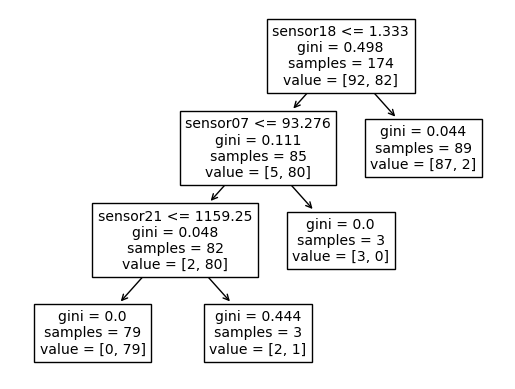

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

predictors = [c for c in sensors.columns if c.startswith('sensor')]
outcome = 'status'
X = sensors[predictors]
y = sensors[outcome]

# Train the model
clf = DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)
clf.fit(X, y)

# Visualization of tree
plot_tree(clf, feature_names=list(X.columns))
plt.show()

In [12]:
# Text representation of tree
print(export_text(clf, feature_names=list(X.columns)))

|--- sensor18 <= 1.33
|   |--- sensor07 <= 93.28
|   |   |--- sensor21 <= 1159.25
|   |   |   |--- class: Pass
|   |   |--- sensor21 >  1159.25
|   |   |   |--- class: Fail
|   |--- sensor07 >  93.28
|   |   |--- class: Fail
|--- sensor18 >  1.33
|   |--- class: Fail



In [13]:
import dtreeviz

# the dtreeviz methods requires the classifier to be trained with a numerical
# representation of the classes
X = sensors[predictors]
y = np.array([1 if yi == 'Pass' else 0 for yi in sensors[outcome]])

# Train the model
clf = DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)
clf.fit(X, y)

warnings.simplefilter('ignore', category=UserWarning)
viz = dtreeviz.model(clf, X, y,
               target_name=outcome,
               feature_names=X.columns,
               class_names=['Fail', 'Pass'])
warnings.simplefilter('default', category=UserWarning)

/usr/local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


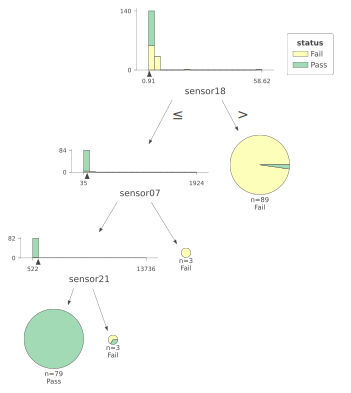

In [14]:
viz.view(fontname='sans-serif')

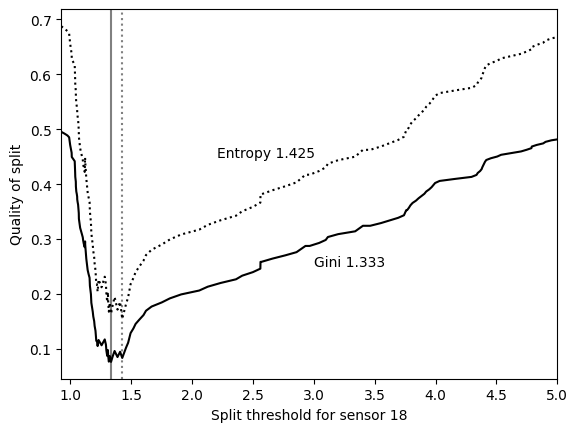

In [15]:
sensor18 = np.array(sensors['sensor18'])
status =  sensors['status']
x = np.array(sorted(sensor18))
split = []
gini = []
entropy = []
N = len(x)
# Iterate over pairs of sensor data
for theta in zip(x[1:], x[:-1]):
    theta = 0.5 * (theta[0] + theta[1])
    left = sensor18 <= theta
    right = sensor18 > theta
    Nleft = sum(left)
    Nright = sum(right)
    pleft = status[left].value_counts().values / Nleft
    pright = status[right].value_counts().values / Nright
    split.append(theta)
    gini.append(Nleft * np.sum(pleft*(1-pleft)) / N + Nright * np.sum(pright*(1-pright)) / N)
    entropy.append(- Nleft * np.sum(pleft*np.log(pleft)) / N - Nright * np.sum(pright*np.log(pright)) / N)

fig, ax = plt.subplots()
ax.axvline(split[np.argmin(gini)], color='grey')
ax.axvline(split[np.argmin(entropy)], color='grey', ls=':')
ax.plot(split, gini, color='black')
ax.plot(split, entropy, color='black', ls=':')
ax.set_xlim(min(split), 5)
ax.set_xlabel('Split threshold for sensor 18')
ax.set_ylabel('Quality of split')
ax.text(2.2, 0.45, f'Entropy {split[np.argmin(entropy)]:.3f}')
ax.text(3, 0.25, f'Gini {split[np.argmin(gini)]:.3f}')
plt.show()

Probabilities of missclassified data points
[[0.97752809 0.02247191]
 [0.97752809 0.02247191]
 [0.66666667 0.33333333]]
Confusion matrix
[[92  0]
 [ 3 79]]


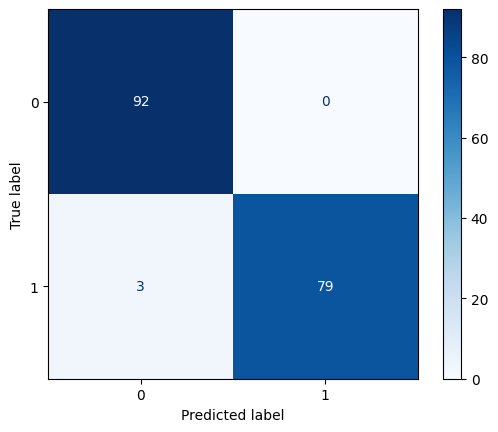

In [16]:
# missclassification probabilities
print('Probabilities of missclassified data points')
print(clf.predict_proba(X.loc[clf.predict(X) != y,:]))

# actual in rows / predicted in columns
print('Confusion matrix')
cm = confusion_matrix(y, clf.predict(X))
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

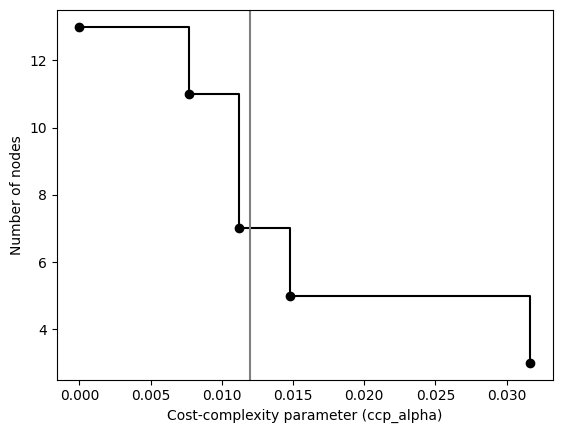

In [17]:
# Code to analyze tree depth vs alpha
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
fig, ax = plt.subplots()
ax.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post",
        color='black')
ax.set_xlabel("Cost-complexity parameter (ccp_alpha)")
ax.set_ylabel("Number of nodes")
ax.axvline(0.012, color='grey')
plt.show()

## Ensemble Models

In [18]:
predictors = [c for c in sensors.columns if c.startswith('sensor')]
outcome = 'status'
X = sensors[predictors]
y = sensors[outcome]

# Train the model
clf = RandomForestClassifier(ccp_alpha=0.012, random_state=0)
clf.fit(X, y)

# actual in rows / predicted in columns
print('Confusion matrix')
print(confusion_matrix(y, clf.predict(X)))

Confusion matrix
[[92  0]
 [ 0 82]]


In [19]:
# On some versions of MACOS, running xgboost can fail. Uncomment the following
# lines to avoid this.
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [20]:
from xgboost import XGBClassifier

predictors = [c for c in sensors.columns if c.startswith('sensor')]
outcome = 'status'
X = sensors[predictors]
# Encode outcome as 0 (Fail) and 1 (Pass)
y = np.array([1 if s == 'Pass' else 0 for s in sensors[outcome]])

# Train the model
xgb = XGBClassifier(objective='binary:logistic', subsample=.63,
                    eval_metric='logloss')
xgb.fit(X, y)

# actual in rows / predicted in columns
print('Confusion matrix')
print(confusion_matrix(y, xgb.predict(X)))

Confusion matrix
[[92  0]
 [ 0 82]]


## Na\"ive Bayes Classifier

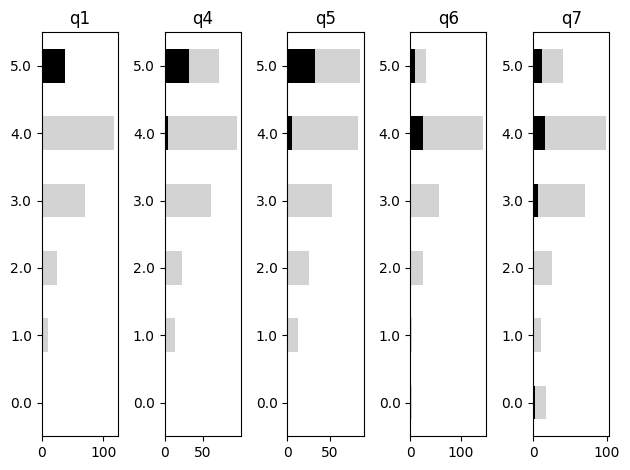

In [21]:
abc = mistat.load_data('ABC.csv')
all_questions = [c for c in abc.columns if c.startswith('q')]
abc[all_questions] = abc[all_questions].astype('category')

questions = ['q1', 'q4', 'q5', 'q6', 'q7']
q1_5 = (abc['q1'] == 5)

fig, axes = plt.subplots(ncols=len(questions))
for ax, question in zip(axes, questions):
  response = abc[question]
  df = pd.DataFrame([
    {satisfaction: counts for satisfaction, counts
      in response.value_counts().items()},
    {satisfaction: counts for satisfaction, counts
      in response[q1_5].value_counts().items()},
  ])
  df = df.transpose()  # flip columns and rows
  # add rows of 0 for missing satisfaction
  for s in range(6):
    if s not in df.index:
      df.loc[s] = [0, 0]
  df = df.fillna(0)  # change missing values to 0
  df = df.sort_index()  # the index contains the satisfaction
  df.columns = ['counts', 'counts_q1_5']  # rename the columns
  df['counts'].plot.barh(y='index', ax=ax, color='lightgrey')
  df['counts_q1_5'].plot.barh(y='index', ax=ax, color='black')
  ax.set_ylim(-0.5, 5.5)
  ax.set_title(question)
plt.tight_layout()
plt.show()

In [22]:
predictors = list(all_questions)
predictors.remove('q1')
target = 'q1'
# q1 has missing values - remove rows from dataset
q1_missing = abc[target].isna()
X = abc.loc[~q1_missing, predictors]
y = abc.loc[~q1_missing, target]

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imp.fit_transform(X)

In [23]:
nb_model = MultinomialNB()
nb_model.fit(X, y)
print(confusion_matrix(y, nb_model.predict(X)))
print(accuracy_score(y, nb_model.predict(X)))

[[ 7  2  2  0  0]
 [ 3 14  4  4  0]
 [ 8  6 35 16  5]
 [ 9  1 12 66 30]
 [ 3  0  2 12 21]]
0.5458015267175572


In [24]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)
_ = dt_model.fit(X, y)

In [25]:
print(confusion_matrix(y, dt_model.predict(X)))
print(accuracy_score(y, dt_model.predict(X)))

[[  8   3   0   0   0]
 [  1  19   4   1   0]
 [  2   4  51  13   0]
 [  1   2  13 102   0]
 [  0   0   0  19  19]]
0.7595419847328244


In [26]:
rf_model = RandomForestClassifier(ccp_alpha=0.014, random_state=0)
_ = rf_model.fit(X, y)

In [27]:
print(confusion_matrix(y, rf_model.predict(X)))
print(accuracy_score(y, rf_model.predict(X)))

[[  4   2   4   1   0]
 [  0  14   8   3   0]
 [  0   0  64   6   0]
 [  0   0   1 116   1]
 [  0   0   0  14  24]]
0.8473282442748091


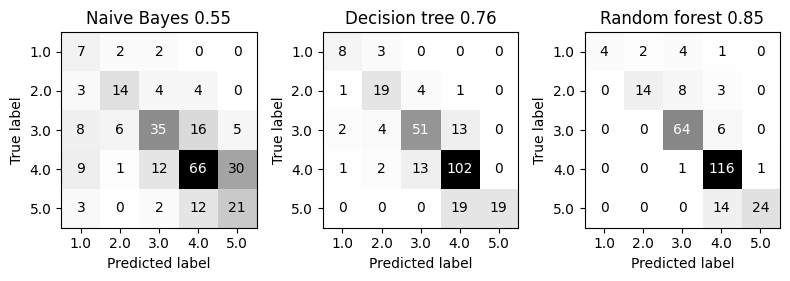

In [28]:
fig, axes = plt.subplots(ncols=3, figsize=(8, 3))
axes[0].set_title(f'Naive Bayes {accuracy_score(y, nb_model.predict(X)):.2f}')
ConfusionMatrixDisplay.from_estimator(nb_model, X, y, ax=axes[0],
  cmap=plt.cm.Greys, colorbar=False)
axes[1].set_title(f'Decision tree {accuracy_score(y, dt_model.predict(X)):.2f}')
ConfusionMatrixDisplay.from_estimator(dt_model, X, y, ax=axes[1],
  cmap=plt.cm.Greys, colorbar=False)
axes[2].set_title(f'Random forest {accuracy_score(y, rf_model.predict(X)):.2f}')
ConfusionMatrixDisplay.from_estimator(rf_model, X, y, ax=axes[2],
  cmap=plt.cm.Greys, colorbar=False)
plt.tight_layout()
plt.show()

## Neural Networks

In [29]:
abc = mistat.load_data('ABC.csv')
all_questions = [c for c in abc.columns if c.startswith('q')]
abc[all_questions] = abc[all_questions].astype('category')
predictors = list(all_questions)
predictors.remove('q1')
target = 'q1'
# q1 has missing values - remove rows from dataset
q1_missing = abc[target].isna()
X = abc.loc[~q1_missing, predictors]
y = abc.loc[~q1_missing, target]

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imp.fit_transform(X)

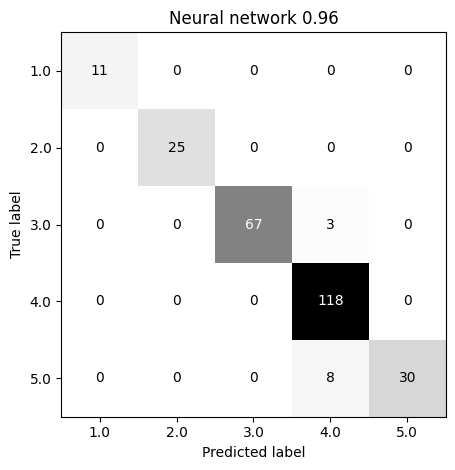

In [30]:
# scale predictor variables to interval (0, 1)
X = MinMaxScaler().fit_transform(X)

clf = MLPClassifier(hidden_layer_sizes=(4, ), activation='logistic',
                    solver='lbfgs', max_iter=1000,
                    random_state=1)
clf.fit(X, y)
# clf.predict(X)
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_estimator(clf, X, y, ax=ax,
  cmap=plt.cm.Greys, colorbar=False)

ax.set_title(f'Neural network {accuracy_score(y, clf.predict(X)):.2f}')
plt.tight_layout()

## Clustering Methods

### Hierarchical Clustering

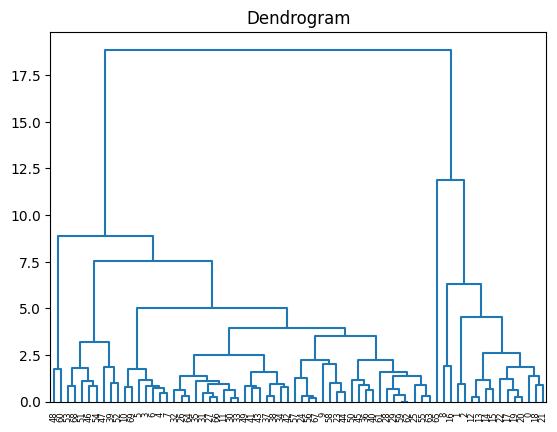

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from mistat import plot_dendrogram

almpin = mistat.load_data('ALMPIN.csv')

scaler = StandardScaler()
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

X = scaler.fit_transform(almpin)
model = model.fit(X)

fig, ax = plt.subplots()
plot_dendrogram(model, ax=ax)
ax.set_title('Dendrogram')
plt.show()

### $K$-means Clustering

In [32]:
from sklearn.cluster import KMeans

almpin = mistat.load_data('ALMPIN.csv')

scaler = StandardScaler()
X = scaler.fit_transform(almpin)
model = KMeans(n_clusters=9, random_state=1).fit(X)
print('Cluster membership (first two data points)')
print(model.predict(X)[:2])
print()
print('Distance to cluster center (first two data points)')
model.transform(X)[:2,:]

Cluster membership (first two data points)
[1 7]

Distance to cluster center (first two data points)


array([[2.6961452 , 1.04495283, 2.58170925, 9.69783046, 5.57643458,
        3.98844284, 3.95650085, 2.4300689 , 2.68955473],
       [5.01851142, 2.7429881 , 4.96341064, 7.9467812 , 7.75144534,
        4.68141833, 6.00629696, 0.4705252 , 4.77922096]])

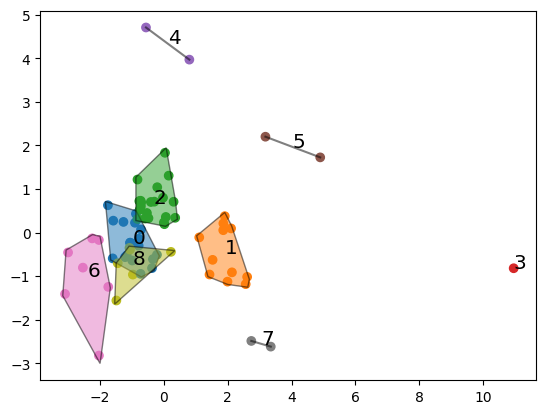

In [33]:
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# use PCA to map the dataset into a 2D space
pca = PCA(n_components=2).fit(X)
coord = pca.transform(X)

fig, ax = plt.subplots()
df = pd.DataFrame({'x': coord[:,0], 'y': coord[:,1],
                   'cluster': model.predict(X)})
colors = [f'C{i}' for i in model.predict(X)]
ax.scatter(df.x, df.y, color=[f'C{cl}' for cl in df.cluster])

from matplotlib.patches import Polygon
for cl, x in df.groupby('cluster'):
  x = x.values[:, :2]
  cent = np.mean(x, axis=0)
  if len(x) == 1:
    pass
  elif len(x) == 2:
    ax.plot(x[:,0], x[:,1], color='black', alpha=0.5)
  else:
    hull = ConvexHull(x)
    pts = []
    for pt in x[hull.simplices]:
        pts.append(pt[0].tolist())
        pts.append(pt[1].tolist())

    pts.sort(key=lambda p: np.arctan2(p[1] - cent[1],
                                    p[0] - cent[0]))
    pts = pts[0::2]  # Deleting duplicates
    pts.insert(len(pts), pts[0])
    k = 1.1
    color = 'green'
    poly = Polygon(k*(np.array(pts)- cent) + cent, edgecolor='black',
                   facecolor=f'C{cl}', alpha=0.5)
    poly.set_capstyle('round')
    ax.add_patch(poly)
  ax.text(*cent, f'{cl}', fontsize='x-large')
plt.show()

### Cluster Number Selection

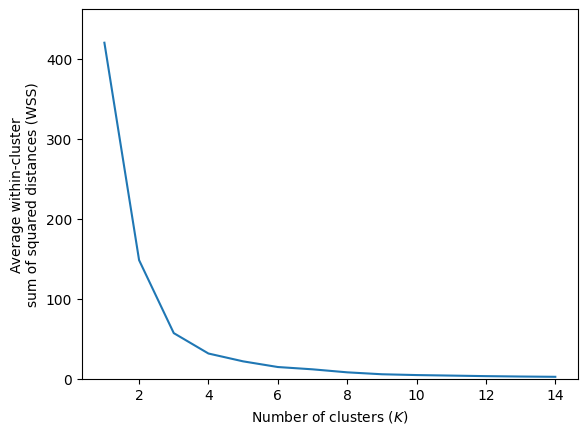

In [34]:
inertia = []

for n_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 15), 'inertia': inertia})

ax = inertias.plot(x='n_clusters', y='inertia')
ax.set_xlabel(r'Number of clusters ($K$)')
ax.set_ylabel('Average within-cluster\nsum of squared distances (WSS)')
ax.set_ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

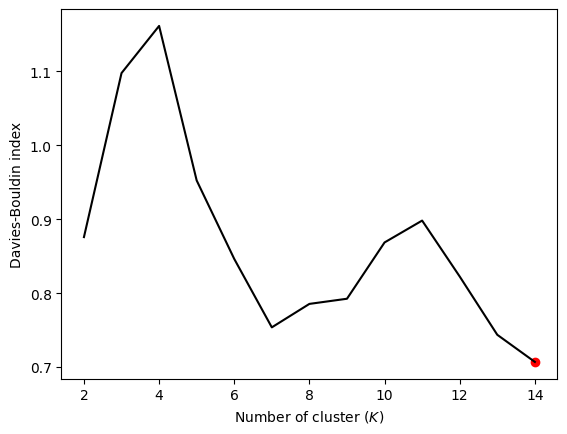

In [35]:
from sklearn import metrics

ss = []
range_n_clusters = list(range(2, 15))
for n_clusters in range_n_clusters:
   clusterer = KMeans(n_clusters = n_clusters, random_state=1)
   cluster_labels = clusterer.fit_predict(X)

   score = metrics.davies_bouldin_score(X, cluster_labels)
   ss.append(score)
opt_index = np.argmin(ss)

fig, ax = plt.subplots()
ax.plot(range_n_clusters, ss,'-', color='black')
ax.scatter(range_n_clusters[opt_index], ss[opt_index], color='red')
ax.set_xlabel(r'Number of cluster ($K$)')
ax.set_ylabel('Davies-Bouldin index')
plt.show()

## Chapter Highlights

## Exercises